# Named Entity Recognition

## NLTK

In [6]:
sample_text_lst =['The COVID-19 pandemic exposed the feeble state of Japan’s vaccine research and development capabilities.',
                  'Only now, for example, are Japanese regulators considering approval of the country’s first homegrown COVID-19 vaccines,',
                  'months after many less advanced nations developed their own shots.',
                  'Determined to catch up, Japan is ramping up a 1.1 trillion yen ($8.5 billion) initiative that aims to give Japan the capability to develop a vaccine for a new virus in 100 days,',
                  'a goal being adopted by many countries.']

In [56]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from matplotlib import pyplot as plt


token_sents = [nltk.word_tokenize(sent) for sent in sample_text_lst]
tagged_sent = [nltk.pos_tag(lst) for lst in token_sents]
print(tagged_sent)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/mn/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/mn/nltk_data...
[nltk_data]   Package words is already up-to-date!


[[('The', 'DT'), ('COVID-19', 'NNP'), ('pandemic', 'NN'), ('exposed', 'VBD'), ('the', 'DT'), ('feeble', 'JJ'), ('state', 'NN'), ('of', 'IN'), ('Japan', 'NNP'), ('’', 'NNP'), ('s', 'VBP'), ('vaccine', 'NN'), ('research', 'NN'), ('and', 'CC'), ('development', 'NN'), ('capabilities', 'NNS'), ('.', '.')], [('Only', 'RB'), ('now', 'RB'), (',', ','), ('for', 'IN'), ('example', 'NN'), (',', ','), ('are', 'VBP'), ('Japanese', 'JJ'), ('regulators', 'NNS'), ('considering', 'VBG'), ('approval', 'NN'), ('of', 'IN'), ('the', 'DT'), ('country', 'NN'), ('’', 'NNP'), ('s', 'VBD'), ('first', 'JJ'), ('homegrown', 'JJ'), ('COVID-19', 'NNP'), ('vaccines', 'NNS'), (',', ',')], [('months', 'NNS'), ('after', 'IN'), ('many', 'JJ'), ('less', 'JJR'), ('advanced', 'JJ'), ('nations', 'NNS'), ('developed', 'VBD'), ('their', 'PRP$'), ('own', 'JJ'), ('shots', 'NNS'), ('.', '.')], [('Determined', 'VBN'), ('to', 'TO'), ('catch', 'VB'), ('up', 'RP'), (',', ','), ('Japan', 'NNP'), ('is', 'VBZ'), ('ramping', 'VBG'), ('up

In [53]:
words_lst=[]
tags_lst =[]
for lst in tagged_sent:
    for word, tag in lst:
        words_lst.append(word)
        tags_lst.append(tag)
        

In [59]:
from collections import Counter
tag_dic = Counter(tags_lst)
tag_dic

Counter({'DT': 8,
         'NNP': 7,
         'NN': 13,
         'VBD': 3,
         'JJ': 9,
         'IN': 7,
         'VBP': 2,
         'CC': 1,
         'NNS': 9,
         '.': 3,
         'RB': 2,
         ',': 5,
         'VBG': 3,
         'JJR': 1,
         'PRP$': 1,
         'VBN': 2,
         'TO': 3,
         'VB': 3,
         'RP': 2,
         'VBZ': 2,
         'CD': 5,
         '(': 1,
         '$': 1,
         ')': 1,
         'WDT': 1})

([<matplotlib.patches.Wedge at 0x7fe878078880>,
 [Text(-0.9982158924706115, 0.4621309684700872, 'DT'),
  Text(-1.097854704896322, -0.06866619937793123, 'NNP'),
  Text(-0.8241859819370945, -0.728503580758796, 'NN'),
  Text(-0.3437604017393543, -1.0449061135795876, 'VBD'),
  Text(0.08680865400486018, -1.0965693127157374, 'JJ'),
  Text(0.6284485313020715, -0.9028025495667752, 'IN'),
  Text(0.8655661609273352, -0.6788189899063776, 'VBP'),
  Text(0.9285440770662119, -0.5897507074563428, 'CC'),
  Text(1.069724741573647, -0.25629860956547174, 'NNS'),
  Text(1.0856553685490975, 0.17706614792366018, '.'),
  Text(1.041704313862872, 0.3533441983102069, 'RB'),
  Text(0.9328529016788625, 0.5829111972070248, ','),
  Text(0.7479783475495904, 0.8065534028178075, 'VBG'),
  Text(0.6350659811254691, 0.8981598964645134, 'JJR'),
  Text(0.5743175751165606, 0.9381680675189462, 'PRP$'),
  Text(0.47857224170860907, 0.9904385944953866, 'VBN'),
  Text(0.30902430414432136, 1.0557007054312875, 'TO'),
  Text(0.0948

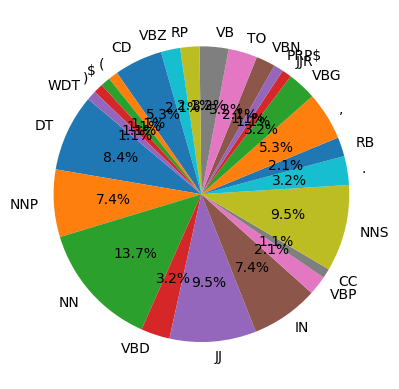

In [63]:
labels=[]
counts=[]
for k, v in tag_dic.items():
    labels.append(k)
    counts.append(v)

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

In [34]:
chunked_sents = [nltk.ne_chunk_sents(lst, binary=True) for lst in tagged_sent]
chunked_sents

[<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7fe87ee1f990>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7fe87ee1f840>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7fe87ee1f920>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7fe87ee1f610>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7fe87ee1fa00>]

## SpaCy

In [65]:
import spacy

nlp = spacy.load('en_core_web_sm')

sample_text2 = ' '.join(sample_text_lst)

doc = nlp(sample_text2)

for ent in doc.ents:
    print(ent.label_, ent.text)

ORG COVID-19
GPE Japan
NORP Japanese
ORDINAL first
ORG COVID-19
DATE months
GPE Japan
MONEY 1.1 trillion yen
MONEY $8.5 billion
GPE Japan
DATE 100 days


## Polyglot

In [70]:
text='La pandemia de COVID-19 expuso el débil estado de las capacidades de investigación y desarrollo de vacunas de Japón\
     Recién ahora, por ejemplo, los reguladores japoneses están considerando la aprobación\
     de las primeras vacunas COVID-19 de cosecha propia del país\
     meses después de que muchas naciones menos avanzadas desarrollaran sus propios tiros.\
     Decidido a ponerse al día, Japón está aumentando una iniciativa de 1,1 billones de yenes\
     ($ 8,5 mil millones) que tiene como objetivo darle a Japón la capacidad de desarrollar una\
     vacuna para un nuevo virus en 100 días\
     una meta que está siendo adoptada por muchos países'
                

In [82]:
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")
downloader.download("pos2.es")

from polyglot.text import Text
import icu

new_text=Text(text)
print('\n\nentities:\n', new_text.entities)

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /home/mn/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!
[polyglot_data] Downloading package ner2.es to
[polyglot_data]     /home/mn/polyglot_data...
[polyglot_data]   Package ner2.es is already up-to-date!
[polyglot_data] Downloading package pos2.es to
[polyglot_data]     /home/mn/polyglot_data...


entities:
 [I-PER(['COVID']), I-LOC(['Japón']), I-LOC(['Japón']), I-LOC(['Japón'])]


In [84]:
entities = [(ent.tag, ' '.join(ent)) for ent in new_text.entities]

# Print entities
print(entities)


[('I-PER', 'COVID'), ('I-LOC', 'Japón'), ('I-LOC', 'Japón'), ('I-LOC', 'Japón')]


In [83]:
for word, tag in new_text.pos_tags:
    print(u"{:<16}{:>2}".format(word, tag))

La              DET
pandemia        NOUN
de              ADP
COVID            X
-               PUNCT
19              NUM
expuso          VERB
el              DET
débil           ADJ
estado          NOUN
de              ADP
las             DET
capacidades     NOUN
de              ADP
investigación   NOUN
y               CONJ
desarrollo      NOUN
de              ADP
vacunas         NOUN
de              ADP
Japón           PROPN
Recién          ADV
ahora           ADV
,               PUNCT
por             ADP
ejemplo         NOUN
,               PUNCT
los             DET
reguladores     NOUN
japoneses       ADJ
están           AUX
considerando    VERB
la              DET
aprobación      NOUN
de              ADP
las             DET
primeras        NUM
vacunas         NOUN
COVID            X
-               PUNCT
19              NUM
de              ADP
cosecha         NOUN
propia          ADJ
del             ADP
país            NOUN
meses           NOUN
después         ADV
de              